In [5]:
import paddle
from paddle import nn
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings("ignore")

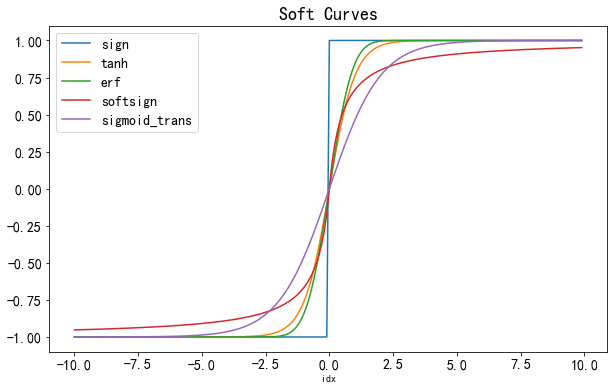

In [7]:
a = paddle.arange(-10., 10., 0.1, dtype='float32')
df = pd.DataFrame()
df['idx'] = a.numpy()
df['sign'] = a.sign()
df['tanh'] = a.tanh()
df['erf'] = a.erf()
df['softsign'] = a / (0.5 + a.abs())
df['sigmoid_trans'] = 2 * (nn.Sigmoid()(a) - 0.5)
df.set_index('idx', drop=True, inplace=True)

df.plot(figsize=(10,6), fontsize=14)
plt.legend(fontsize=14)
plt.title('Soft Curves', fontsize=18)
plt.savefig('./softcurves.png',dpi=300, quality=100)

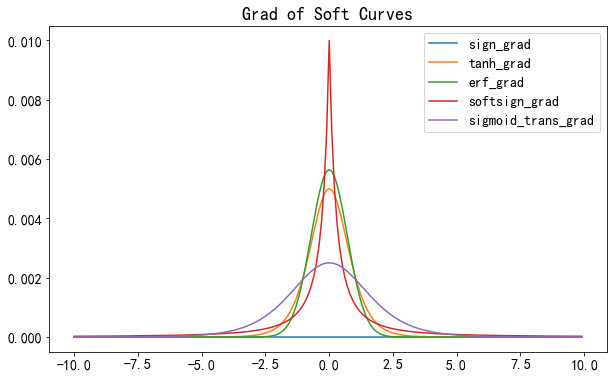

In [8]:
def get_grad(name='tanh'):
    a = paddle.arange(-10., 10., 0.1, dtype='float32')
    a.stop_gradient=False
    if name=='tanh':
        b = a.tanh()
    elif name=='sign':
        b = a.sign()
    elif name=='softsign':
        b = a / (0.5 + a.abs())
    elif name=='erf':
        b = a.erf()
    elif name=='sigmoid_trans':
        b = 2 * (nn.Sigmoid()(a) - 0.5)
    b.mean().backward()
    return a.grad.detach().numpy()

df1 = pd.DataFrame()
df1['sign_grad'] = get_grad(name='sign')
df1['tanh_grad'] = get_grad(name='tanh')
df1['erf_grad'] = get_grad(name='erf')
df1['softsign_grad'] = get_grad(name='softsign')
df1['sigmoid_trans_grad'] = get_grad(name='sigmoid_trans')
df1.index=a.detach().numpy()
df1.plot(figsize=(10,6), fontsize=14)
plt.legend(fontsize=14)
plt.title('Grad of Soft Curves', fontsize=18)
plt.savefig('./grad_of_softcurves.png',dpi=300, quality=100)